Start by copying this into your Google Drive!!

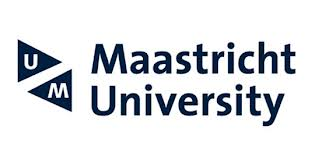
#Faculty of Science and Engineering - Department of Advanced Computer Sciences
# Course Advanced Natural Language Processing (ANLP) - Tutorial Tokenization

By Jan Scholtes
Version 2024-2025.1



---



Welcome to the tutorial on Tokenization. In this notebook you will learn how to preprocess text into tokens.

This is the basis of any Information Retrieval, Text Mining or NLP process. Tokenization is closely related to sentence detection, stemming, lemmatization and is part of the large NLP research topic named morphology.

Tokenization is highly language dependent. In this tutorial we focus on Western-European languages.

In this notebook, we will use the Stanford NLTK library.



Text extraction and cleanup is an important component of real-world NLP systems. Text extraction allows one to extract text from various electronic file formats (TXT, HTML, XML, PDF, DOCX, XLSX, PPTX, ...) and deals with the encoding of the characters (Unicode, UTF-8, Code pages or ACSII).

Libraries such as BeautifulSoup, Scapy or Selenium can assist you with webscraping and parsing text from HTML and XML.

You can run the example hereunder to see how a Webpage is scraped and parsed into tags, which can subsequently be questioned (remove the # before this line:"pprint(soupified.prettify())" to see the entire HTML file (it is long).

In [ ]:
# making the necessary imports,
! pip install requests
! pip install beautifulsoup4

from pprint import pprint
from bs4 import BeautifulSoup
import requests

myurl = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"
html = requests.get(myurl, headers={'user-agent': 'Scraper'}).text # query the website
soupified = BeautifulSoup(html, 'html.parser') # parse the html in the 'html' variable, and store it in Beautiful Soup format"

#pprint(soupified.prettify())      # for printing the full HTML structure of the webpage

question = soupified.find("div", {"class": "question"}) # find the nevessary tag and class which it belongs to
questiontext = question.find("div", {"class": "s-prose js-post-body"})
print("Question: \n", questiontext.get_text().strip())
answer = soupified.find("div", {"class": "answer"}) # find the nevessary tag and class which it belongs to
answertext = answer.find("div", {"class": "s-prose js-post-body"})
print("Best answer: \n", answertext.get_text().strip())

PDF can be quite challenging, especially from a formatting point of view. There are also many PDF reverse engineered formats that do not follow the official PDF guideliness completely. For popular formats from Microsoft, Google, Open Office and other vendors, there are several open source libraries to exract text and meta data. For more obscure file types, one has to fall back to commercial solutions such as Oracle Outside In, but these can be expensive.

Encoding normalization is important to map various variants of code pages (https://en.wikipedia.org/wiki/Code_page ), ASCII and other encodings to one common Unicode format (https://home.unicode.org/). UTF-8 is the most used one.

In this tutorial, we presume all this has been done and we can start with UTF-8 text files that only contain basic line (CR-LF) and tab formatting.

#NLTK

First we load NLTK

In [ ]:
import nltk
nltk.download('punkt') # load tokenization

NLTK also contains many text corpora. Let's import the movie reviews.

In [ ]:
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
movie_reviews.readme()

Let's see what is in there

In [ ]:
raw = movie_reviews.raw()
print(raw[0:1000:1]) # print first 1000 chars


Let's see if we can detect the long tail that is typical for natural language. First we seperate the text in indivudual words, then we run a frequency analsyis on the results.

In [ ]:
corpus = movie_reviews.words()
print(corpus)
freq_dist = nltk.FreqDist(corpus)
print(freq_dist)
print(freq_dist.most_common(50))
freq_dist.plot(500)

# Exercise 1: Language Frequencies
a. What kind of a relation do you observe? A lineair, polynomial or power relation?  
I observe a power=law distribution, which is common in natural language word frequency distributions. This is also known as Zipf's Law, where the most frequent words have very high counts and there is a steep drop-off as you move to less frequent words. 
b. What are the most frequent words?
The most frequent words are 'function words' or stop wprds like "the," "is," "of," "and," etc. 
c. Do these words have a clear meaning or can they have multiple meaning depending on the context?
These are functional words, that means that they don't carry an independent meaning outside of the sentence. Furthermore, these words are either highly present in the corpus and highly present in the single sentences, meaning that they are not very informative about the categorization of the documents. 
d. Can these words also be used for (long) distance (complex) references?
It depends on the word. Function words like (like "the," "is," "of," etc.) have a limit referential power and are not suitable for mantaining context, but we can see that there are some pronouns, and they are able to refer back to or forward to specific entities across sentences or even paragraph, maintaning context over a distance. 
e. What does this mean for your NLP algorithm?

You want to get some meaning out of the sentences by using the NLP algorithm, but this words are not very informative, because they are functional words; because of that, you may need to remove them, in order to help the algorithm to focus on more meaningful words. However, you can sort the words to respect to indexes able to give greater weight to words that appear more frequently within a single document, rather than across the entire corpus; and example is the TF-IDF. 


ANSWER HERE:

1.a
I observe a power-law distribution, which is common in natural language word frequency distributions. This is also known as Zipf's Law, where the most frequent words have very high counts and there is a steep drop-off as you move to less frequent words. 

1.b
The most frequent words are 'functional words' or stop wprds like "the," "is," "of," "and," etc. 

1c.
These are functional words, that means that they don't carry an independent meaning outside of the sentence. Furthermore, these words are either highly present in the corpus and highly present in the single sentences, meaning that they are not very informative about the categorization of the documents. 

1d.
It depends on the word. Function words like (like "the," "is," "of," etc.) have a limit referential power and are not suitable for mantaining context, but we can see that there are some pronouns, and they are able to refer back to or forward to specific entities across sentences or even paragraph, maintaning context over a distance. 

1e.
You want to get some meaning out of the sentences by using the NLP algorithm, but this words are not very informative, because they are functional words; because of that, you may need to remove them, in order to help the algorithm to focus on more meaningful words. However, you can sort the words to respect to indexes able to give greater weight to words that appear more frequently within a single document, rather than across the entire corpus; and example is the TF-IDF. 

As you can also observe, punctuation characters such as .  and , and other ones (: ; " " ? ! ) are still in there. This is where tokenization comes in. Tokenization removes punctuations where they are used as sentence and phrase seperation, but leaves them where they are part of a token (e.g. an email address or abbreviation).  

#Sentence Detection

Sentences are the basic components of human language. For all of the applications we discuss in this course (e.g. Machine Translation, Abstracting, ...) the algorithms used to process language presume that the data consists of correct linguistic sentences. When machine learning is applied, this is also done using correct linguistic sentences. Therefor, sentence detection is extremely important in NLP. If language does not have the form of linguistic sentences, then many of the algorithms we teach in this course will not work. This is the case when dealing with tables, graphs or certain types of headers and footers (e.g. an address in the top of a letter).

Next, we load the NLTK tokenizer for sentences (sent_tokenize) and for words (word_tokenize)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [27]:
my_text = "The Department of Advanced Computing Sciences - RNA-GB sometimes abbreviated as DACS - \n is Maastricht University’s largest and oldest department \n broadly covering the fields of artificial intelligence, data science, computer science, \n mathematics and robotics. We maintain a large network of public and \n private partners through our research collaborations and through the \n award-winning KE@Work programme. In addition, our staff teaches approximately 800 bachelor’s and master’s \n students in 3 specialized study programmes in Data Science \n and Artificial Intelligence. The Department of Advanced Computing Sciences \n  is the new joint identity of the Institute of Data Science (IDS) and the former \n Department of Data Science and Knowledge Engineering (DKE)."
print(my_text)


The Department of Advanced Computing Sciences - RNA-GB sometimes abbreviated as DACS - 
 is Maastricht University’s largest and oldest department 
 broadly covering the fields of artificial intelligence, data science, computer science, 
 mathematics and robotics. We maintain a large network of public and 
 private partners through our research collaborations and through the 
 award-winning KE@Work programme. In addition, our staff teaches approximately 800 bachelor’s and master’s 
 students in 3 specialized study programmes in Data Science 
 and Artificial Intelligence. The Department of Advanced Computing Sciences 
  is the new joint identity of the Institute of Data Science (IDS) and the former 
 Department of Data Science and Knowledge Engineering (DKE).


# Word Detection aka Tokenization

In [28]:
my_sentences = sent_tokenize(my_text)
# print(my_sentences) # print entire list unformatted
print("\n")
for x in range(len(my_sentences)):
    print(my_sentences[x]+"\n")



The Department of Advanced Computing Sciences - RNA-GB sometimes abbreviated as DACS - 
 is Maastricht University’s largest and oldest department 
 broadly covering the fields of artificial intelligence, data science, computer science, 
 mathematics and robotics.

We maintain a large network of public and 
 private partners through our research collaborations and through the 
 award-winning KE@Work programme.

In addition, our staff teaches approximately 800 bachelor’s and master’s 
 students in 3 specialized study programmes in Data Science 
 and Artificial Intelligence.

The Department of Advanced Computing Sciences 
  is the new joint identity of the Institute of Data Science (IDS) and the former 
 Department of Data Science and Knowledge Engineering (DKE).



Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation.
A token is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing. A type is the class of all tokens containing the same character sequence.

In [29]:
for sentence in my_sentences:
    print("Sentence: "+str(sentence))
    my_words = word_tokenize(sentence)
    print("Tokens: ")
    for x in range(len(my_words)):
      print("    "+str(my_words[x]))


Sentence: The Department of Advanced Computing Sciences - RNA-GB sometimes abbreviated as DACS - 
 is Maastricht University’s largest and oldest department 
 broadly covering the fields of artificial intelligence, data science, computer science, 
 mathematics and robotics.
Tokens: 
    The
    Department
    of
    Advanced
    Computing
    Sciences
    -
    RNA-GB
    sometimes
    abbreviated
    as
    DACS
    -
    is
    Maastricht
    University
    ’
    s
    largest
    and
    oldest
    department
    broadly
    covering
    the
    fields
    of
    artificial
    intelligence
    ,
    data
    science
    ,
    computer
    science
    ,
    mathematics
    and
    robotics
    .
Sentence: We maintain a large network of public and 
 private partners through our research collaborations and through the 
 award-winning KE@Work programme.
Tokens: 
    We
    maintain
    a
    large
    network
    of
    public
    and
    private
    partners
    through
    our
    res

As you can observe, there are still punctuation in the list of tokens. In NLTK these can be removed by using a regular expression.

In [30]:
from nltk.tokenize import RegexpTokenizer
new_tokenizer = RegexpTokenizer(r'\w+')
for sentence in my_sentences:
    print("Sentence: "+str(sentence))
    my_words = new_tokenizer.tokenize(sentence)
    print("Tokens: ")
    for x in range(len(my_words)):
      print("    "+str(my_words[x]))

Sentence: The Department of Advanced Computing Sciences - RNA-GB sometimes abbreviated as DACS - 
 is Maastricht University’s largest and oldest department 
 broadly covering the fields of artificial intelligence, data science, computer science, 
 mathematics and robotics.
Tokens: 
    The
    Department
    of
    Advanced
    Computing
    Sciences
    RNA
    GB
    sometimes
    abbreviated
    as
    DACS
    is
    Maastricht
    University
    s
    largest
    and
    oldest
    department
    broadly
    covering
    the
    fields
    of
    artificial
    intelligence
    data
    science
    computer
    science
    mathematics
    and
    robotics
Sentence: We maintain a large network of public and 
 private partners through our research collaborations and through the 
 award-winning KE@Work programme.
Tokens: 
    We
    maintain
    a
    large
    network
    of
    public
    and
    private
    partners
    through
    our
    research
    collaborations
    and
    t

#Exercise 2: Preprocessing for Tokenization
As you can observe, our tokenizer cannot deal with tokens such as "Bachelor's" or "Master's". This has to do with the fact that the NLTK tokenizer does not recognize 's as 'its'. It is not part of the tokenizer's code to deal with that. When dealing with chemical formulas, RNA/DNA, part numbers, phone numbers (with spaces, -, . etc) we see similar problems. When there are problems with the tokenization, the errors propagate in subsequent parts of the processing.

We can address this problem by applying preprocessing and normalization of such tokens.

Write some code to preprocess 's into its and then do proper tokenization.

YOUR ANSWER HERE

In [ ]:
#Contractions expansion
import re

contractions_dict = {
    "ain’t": "are not", "’s": " its", "aren’t": "are not", "can’t": "cannot", 
    "can’t’ve": "cannot have", "’cause": " because", "could’ve": "could have", 
    "couldn’t": "could not", "couldn’t’ve": "could not have", "didn’t": "did not", 
    "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", 
    "hadn’t’ve": "had not have", "hasn’t": "has not", "haven’t": "have not", 
    "he’d": " he would", "he’d’ve": " he would have", "he’ll": " he will", 
    "he’ll’ve": " he will have", "how’d": " how did", "how’d’y": " how do you", 
    "how’ll": " how will", "I’d": " I would", "I’d’ve": " I would have", 
    "I’ll": " I will", "I’ll’ve": " I will have", "I’m": " I am", "I’ve": " I have", 
    "isn’t": "is not", "it’d": " it would", "it’d’ve": " it would have", 
    "it’ll": " it will", "it’ll’ve": " it will have", "let’s": " let us", 
    "ma’am": "madam", "mayn’t": "may not", "might’ve": "might have", 
    "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", 
    "mustn’t": "must not", "mustn’t’ve": "must not have", "needn’t": "need not", 
    "needn’t’ve": "need not have", "o’clock": "of the clock", "oughtn’t": "ought not", 
    "oughtn’t’ve": "ought not have", "shan’t": "shall not", "sha’n’t": "shall not", 
    "shan’t’ve": "shall not have", "she’d": " she would", "she’d’ve": " she would have", 
    "she’ll": " she will", "she’ll’ve": " she will have", "should’ve": "should have", 
    "shouldn’t": "should not", "shouldn’t’ve": "should not have", "so’ve": "so have", 
    "that’d": "that would", "that’d’ve": "that would have", "there’d": "there would", 
    "there’d’ve": "there would have", "they’d": "they would", "they’d’ve": "they would have", 
    "they’ll": "they will", "they’ll’ve": "they will have", "they’re": "they are", 
    "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would", 
    "we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", 
    "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will", 
    "what’ll’ve": "what will have", "what’re": "what are", "what’ve": "what have", 
    "when’ve": "when have", "where’d": "where did", "where’ve": "where have", 
    "who’ll": "who will", "who’ll’ve": "who will have", "who’ve": "who have", 
    "why’ve": "why have", "will’ve": "will have", "won’t": "will not", 
    "won’t’ve": "will not have", "would’ve": "would have", "wouldn’t": "would not", 
    "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would", 
    "y’all’d’ve": "you all would have", "y’all’re": "you all are", "y’all’ve": "you all have", 
    "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", 
    "you’ll’ve": "you will have", "you’re": "you are", "you’ve": "you have"
}

contractions_re = re.compile('|'.join(re.escape(key) for key in contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

def tokenize_text(text):
    tokens = re.findall(r'\b\w+(?:-\w+)*\'?\w*|\b[A-Z][a-z]?\d*-?[A-Z]?\d*|[^\w\s]', text)
    return tokens

tok_sentences = []
for sentence in my_sentences:
    print("Sentence: " + str(sentence))
    sentence = expand_contractions(sentence)
    print("Normalized sentence: " + str(sentence))
    my_words = tokenize_text(sentence)
    tok_sentences.append(my_words)
    print("Tokens: ")
    for x in range(len(my_words)):
      print("    "+str(my_words[x]))

      


Sentence: The Department of Advanced Computing Sciences - RNA-GB sometimes abbreviated as DACS - 
 is Maastricht University’s largest and oldest department 
 broadly covering the fields of artificial intelligence, data science, computer science, 
 mathematics and robotics.
Normalized sentence: The Department of Advanced Computing Sciences - RNA-GB sometimes abbreviated as DACS - 
 is Maastricht University its largest and oldest department 
 broadly covering the fields of artificial intelligence, data science, computer science, 
 mathematics and robotics.
Tokens: 
    The
    Department
    of
    Advanced
    Computing
    Sciences
    -
    RNA-GB
    sometimes
    abbreviated
    as
    DACS
    -
    is
    Maastricht
    University
    its
    largest
    and
    oldest
    department
    broadly
    covering
    the
    fields
    of
    artificial
    intelligence
    ,
    data
    science
    ,
    computer
    science
    ,
    mathematics
    and
    robotics
    .
Sentence: 

[nltk_data] Downloading package punkt to C:\Users\Aurora Pia
[nltk_data]     Ghiardell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
#Remove Punctuation
nltk.download('punkt')
def remove_punct(token):
    return [word for word in token if word.isalpha()]

for sentence in tok_sentences:
    print("Sentence: " + str(sentence))
    my_words = remove_punct(sentence)
    print("Tokens: ")
    for x in range(len(my_words)):
      print("    "+str(my_words[x]))

Sentence: ['The', 'Department', 'of', 'Advanced', 'Computing', 'Sciences', '-', 'RNA-GB', 'sometimes', 'abbreviated', 'as', 'DACS', '-', 'is', 'Maastricht', 'University', 'its', 'largest', 'and', 'oldest', 'department', 'broadly', 'covering', 'the', 'fields', 'of', 'artificial', 'intelligence', ',', 'data', 'science', ',', 'computer', 'science', ',', 'mathematics', 'and', 'robotics', '.']
Tokens: 
    The
    Department
    of
    Advanced
    Computing
    Sciences
    sometimes
    abbreviated
    as
    DACS
    is
    Maastricht
    University
    its
    largest
    and
    oldest
    department
    broadly
    covering
    the
    fields
    of
    artificial
    intelligence
    data
    science
    computer
    science
    mathematics
    and
    robotics
Sentence: ['We', 'maintain', 'a', 'large', 'network', 'of', 'public', 'and', 'private', 'partners', 'through', 'our', 'research', 'collaborations', 'and', 'through', 'the', 'award-winning', 'KE', '@', 'Work', 'programme', '.']

[nltk_data] Downloading package punkt to C:\Users\Aurora Pia
[nltk_data]     Ghiardell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Generate a Vocabulary

A vocabulary is a data structure containing every unique word used in the corpus only once and in alphabetical order. This can be used as a dictionairy in NLP or as the basis of a search index in information retrieval.

In [34]:
corpus_tokens = new_tokenizer.tokenize(my_text.lower()) #use the tokenizer that removes punctuation
vocab = sorted(set(corpus_tokens))
print(vocab)
print("Tokens:", len(corpus_tokens))
print("Vocabulary:", len(vocab))

['3', '800', 'a', 'abbreviated', 'addition', 'advanced', 'and', 'approximately', 'artificial', 'as', 'award', 'bachelor', 'broadly', 'collaborations', 'computer', 'computing', 'covering', 'dacs', 'data', 'department', 'dke', 'engineering', 'fields', 'former', 'gb', 'identity', 'ids', 'in', 'institute', 'intelligence', 'is', 'joint', 'ke', 'knowledge', 'large', 'largest', 'maastricht', 'maintain', 'master', 'mathematics', 'network', 'new', 'of', 'oldest', 'our', 'partners', 'private', 'programme', 'programmes', 'public', 'research', 'rna', 'robotics', 's', 'science', 'sciences', 'sometimes', 'specialized', 'staff', 'students', 'study', 'teaches', 'the', 'through', 'university', 'we', 'winning', 'work']
Tokens: 109
Vocabulary: 68


#Stop Words

In the past, when computer resources were still limited, highly frequent words were often removed in information retrieval applications. These are named stop-words or noise-words. These are words such as "the, on, in, a, be, or, and, an, for, to, ...". If such a word is removed, one can no longer search for them. Imagine searching for "to be or not to be", which is no longer after noise word removal.

In text-mining and advanced NLP (especially when using context-sensitive deep-leaning models), these words often contain important clues on the meaning of language. Removing them will completely destroy the performance of the models.

So, these days as computer resources are much larger and context sensitive models need these words for disambiguation, noise words are no longer removed.

But let's try how to remove them using NLTK.

In [35]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print("Stopwords from NLTK:", stopwords.words('english'))
stop_words_nltk = set(stopwords.words('english'))
# we use the token list without punctuations
print("Tokenized corpus:",corpus_tokens)
#now remove stopwords
tokenized_corpus_without_stopwords = [i for i in corpus_tokens if not i in stop_words_nltk]
print("Tokenized corpus without stopwords:",tokenized_corpus_without_stopwords)

Stopwords from NLTK: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 's

[nltk_data] Downloading package stopwords to C:\Users\Aurora Pia
[nltk_data]     Ghiardell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Exercise 3: Stopwords and Case Sensitivity

ANSWER HERE

3.a What do you observe with respect to case sensitivity of proper names and words such as "I".

The tokenized output reveals that proper names, such as "Maastricht University" and "Artificial Intelligence," are transformed to lowercase, appearing as "maastricht" and "university." This alteration can lead to a significant loss of contextual and identity information. For instance, "Maastricht" specifically refers to a city, while "maastricht" lacks the same distinct meaning. Similarly, the phrase "Artificial Intelligence" loses its significance when split into lowercase words, obscuring its identity as a recognized field of study.
Additionally, the representation of the word "I" as "i" poses its own challenges. The pronoun "I" denotes a specific individual, conveying personal agency and intention. In contrast, using "i" may imply a generic action rather than referring to a particular person. This loss of capitalization can dilute the personal significance and clarity of the text, leading to potential misunderstandings in communication.

3.b How can we solve that?'

You can use a predefined list of proper nouns or leveraging Named Entity Recognition (NER) techniques.

3.c Could this actions also lead to unwanted side effects?

Yes, these actions can lead to unwanted side effects. By converting everything to lowercase and splitting words, we introduce ambiguity into the text. As mentioned earlier, the pronoun "I" is a prime example of this issue; when represented as "i," it loses its significance as a specific reference to an individual, potentially leading to misunderstandings.
Furthermore, the separation of terms like "Artificial Intelligence" means that we are modeling these words individually, which can obscure their relationship and meaning when used together. In a diverse corpus, this could hinder the ability to connect these words effectively, resulting in a lack of clarity regarding their combined significance.
Similarly, in the case of "DACS," which stands for "Department of Advanced Computing Sciences," splitting it into "department," "advanced," "computing," and "sciences" loses the cohesiveness of the original acronym. This disaggregation can lead to confusion, as the individual terms may not convey the intended meaning without the context provided by their original form. Thus, the process of lowering and splitting words compromises the clarity and richness of the text, ultimately affecting its interpretation and analysis.




#Stemming

Stemming is the process of removing suffixes and reducing the word to some base form such that all different variations of a word can be represented by one form. Stemming uses rules and may not always result in the correct linguistic base form. However, it is fast and therefor often used by search engines. As we discussed in the lecture, a well-known stemmer for the English language is the Porter stemmer.

Let's try it ...

In [ ]:
from nltk.stem import PorterStemmer
stemmer= PorterStemmer()
print("before stemming -> after stemming")
for word in corpus_tokens:
  print(str(word) + " -> " + str(stemmer.stem(word)))


As you can see, "students" is converted into "student", but "Science" is converted into "scien". There are other non-linguistically correct transformations.

#Lemmatization

This why we prefer to use lemmatization for linguistic applications other than search engines. Lemmatization is the process of mapping all tokens to its base-linguistic form: the "lemma". So "better" should be converted to "good" and "is" to "be".

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')  # downloading wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
print("before lemmatization -> after lemmarization")
for word in corpus_tokens:
  print(str(word) + " -> " + str(lemmatizer.lemmatize(word)))

As you can observe, only plurals and other basic operations are performed. But "is" not converted to "be". Neither are several verb inflections. This is because Lemmatization requires more linguistic knowledge: it need to know whether we are dealing with, for instance, a verb, noun or a adjectice. We call these gramatical roles "part-of-speech" or POS tags. These will be discussed in the next lecture: Syntax and Semantics.

In [ ]:
print(lemmatizer.lemmatize('better'))
print(lemmatizer.lemmatize('better',pos='a')) # a for Adjective
print(lemmatizer.lemmatize('is'))
print(lemmatizer.lemmatize('is',pos='v'))  # v for Verb
print(lemmatizer.lemmatize('is',pos='a'))
print(lemmatizer.lemmatize('is',pos='n'))  # n for Noun
print(lemmatizer.lemmatize('richer',pos='n'))
print(lemmatizer.lemmatize('richer',pos='a'))




# Text-Normalization

In social media, one can run in short-cuts, slang, hash-tags, or emoticons. These can be concerted to their textual forms. Phone numbers, dates and monetary amounts can be written in many different forms. Sometimes, one can even decide to convert all text to either lower case or upper case. This may cause problems in some applications and should be used carefully. We will discuss this in more detail in the course Text Mining, where this is more important.

#Language Detection

Almost all NLP models and algorithms are very language specific: this means that one can only use them with the intenred language. Using them on other language will result in random behavior.  

So, language detection (often per sentence or minimally per paragrpah) is essential for any type of NLP application to perform correctly!

In [ ]:
!pip install langdetect
from langdetect import detect, detect_langs
def language_detection(text, method = "single"):
  if(method.lower() != "single"):
    result = detect_langs(text)
  else:
    result = detect(text)
  return result

multilingual_text = "Elle est vraiment éfficace dans la détection de langue."
print(language_detection(multilingual_text))
multilingual_text = "Het is enorm makkelijk om een taal te herkennen!"
print(language_detection(multilingual_text))
multilingual_text = "Es ist wirklich effektiv bei der Spracherkennung."
print(language_detection(multilingual_text))
multilingual_text = "Nó thực sự hiệu quả trong việc phát hiện ngôn ngữ."
print(language_detection(multilingual_text))
multilingual_text = "إنه فعال حقًا في اكتشاف اللغة."
print(language_detection(multilingual_text))

# Transliteration

Transliteration refers to the method of mapping from one system of writing to another based on phonetic similarity. With this tool, you type in Latin letters (e.g. a, b, c etc.), which are converted to characters that have similar pronunciation in the target language. For transliteration, you need to select the target language. So, results for a transliteration of a Arabic name into English, French or German can be very different for similar names.

Лев Николаевич Толстой

results in different forms of transliteration for different target languages:

Lev Nikolayevich Tolstoy

Léon Tolstoï

Lev Tolstoj

León Tolstó

Lev Tolstoy

Lav Tolstoj

Lev Tolsto

Liuni Tolstoi

Ļevs Tolstojs

Levs Tuolstuos

...




A Python library for transliteration can be found here: https://pypi.org/project/transliterate/. We will discuss this in more detail in the lecture on Machine Translation.

#Exercise 4: Final reflections on tokenization.

As we have seen in this tutorial, tokenization is a very important component of NLP. Any error in this phase will propagate in the rest of the processing. Tokenization errors can occur from:
- wrong character set (character encodings not in tokenizer)
- wrong language
- wrong sentence detection or no sentences at whole
- un-expected tokens (chemical formula, RNA/DNA. part numbers, ...)
- wrongly dealing with abbreviations
- different spelling variations (212)-123.4567 vs 212 123 4567 for NYC phone numbers.
- text mutilation by using removal of stop words or stemming
- typos, spelling variations and errors

4.a How would you identify potential tokenization problems in your NLP project?


4.b In what order would you do the detection and pre-processing to deal with the above problems in your NLP project?


YOUR ANSWER HERE

4a.
To evaluate how well the tokenizer handles various problematic structures, it is essential to create and test cases reflecting the specific domain of the corpus. The first step is to identify the domain of the corpus, as its characteristics dictate the types of edge cases to consider: this might be helpful because for example, scientific texts may include chemical formulas, while legal documents might use specialized jargon and abbreviations.
Next, I would develop test cases that encompass a variety of scenarios including special characters such as chemical formulas like "H2O is the chemical formula for water" and "C6H12O6 is glucose," as well as phone numbers such as "Call me at (212)-123-4567" and "My number is 212.123.4567." I would also include common abbreviations like "The U.S. government is based in Washington"...
Furthermore, I would incorporate known problematic structures such as phrases with multiple elements like "Artificial Intelligence (AI)" and "The Department of Advanced Computing Sciences"
In the end, I would run these edge cases through the tokenizer and evaluate the output for correct tokenization; it is important to check if the tokenizer effectively maintains context.

4b.


I would do preprocessing with some test cases, then this will be followed by a detection phase and then another preprocessing to fix the potential errors in the previous pre processing phase. 

# Submission
Please share your Colab notebook by clicking File on the top-left corner. Click under Download on Download .ipynb and upload that file to Canvas.